In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import seaborn as sns
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold

#load the dataset
dataframe = pd.read_excel('/content/drive/MyDrive/ANN_Project_data_Groups.xlsx', sheet_name='cluster7', usecols=[5])

dataset = dataframe.to_numpy()
dataset

array([[1.        ],
       [1.        ],
       [1.01340938],
       [1.02841415],
       [1.02128117],
       [1.02413999],
       [1.02595848],
       [1.02890648],
       [1.02777222],
       [1.02753377],
       [1.03254132],
       [1.03681309],
       [1.03391533],
       [1.02572   ],
       [1.03678697],
       [1.04052553],
       [1.04912274],
       [1.05058151],
       [1.04652727],
       [1.03935804],
       [1.03951516],
       [1.04714774],
       [1.04752465],
       [1.0482815 ],
       [1.04002761],
       [1.04294488],
       [1.0363059 ],
       [1.04753793],
       [1.05293734],
       [1.0604799 ],
       [1.06812044],
       [1.07375003],
       [1.09372276],
       [1.14399867],
       [1.2144767 ],
       [1.36340201],
       [2.25813254],
       [2.99990535],
       [3.43517941],
       [3.62927751],
       [3.63631532],
       [3.49562317],
       [3.2644616 ],
       [2.98600437],
       [2.69243781],
       [2.43488565],
       [2.19944391],
       [2.004

Text(0, 0.5, 'Concentrations')

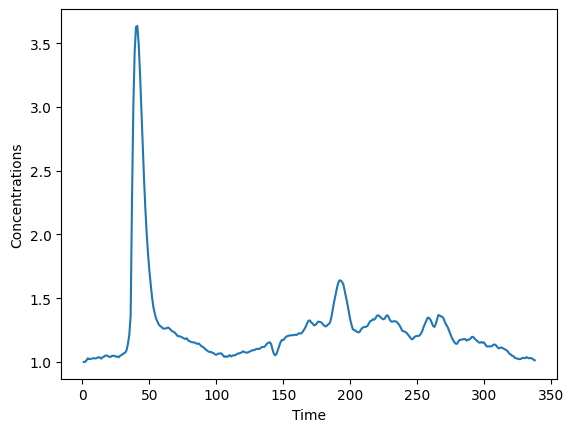

In [10]:
# dataset.shape
t = np.arange(1, 339)
plt.style.use('default')
# print(plt.style.available)
plt.plot(t, dataset)
plt.xlabel('Time')
plt.ylabel('Concentrations')

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.        ],
       [0.        ],
       [0.00508641],
       [0.01077798],
       [0.00807232],
       [0.00915672],
       [0.0098465 ],
       [0.01096473],
       [0.01053449],
       [0.01044404],
       [0.01234349],
       [0.01396384],
       [0.01286467],
       [0.00975604],
       [0.01395393],
       [0.01537204],
       [0.0186331 ],
       [0.01918644],
       [0.0176486 ],
       [0.01492919],
       [0.01498878],
       [0.01788395],
       [0.01802692],
       [0.01831401],
       [0.01518317],
       [0.01628974],
       [0.01377145],
       [0.01803196],
       [0.02008005],
       [0.02294107],
       [0.02583926],
       [0.02797466],
       [0.03555066],
       [0.05462119],
       [0.08135472],
       [0.13784467],
       [0.47723143],
       [0.75859869],
       [0.92370567],
       [0.99733044],
       [1.        ],
       [0.94663303],
       [0.85894945],
       [0.75332581],
       [0.64197093],
       [0.54427694],
       [0.45496982],
       [0.380

Text(0, 0.5, 'Concentrations')

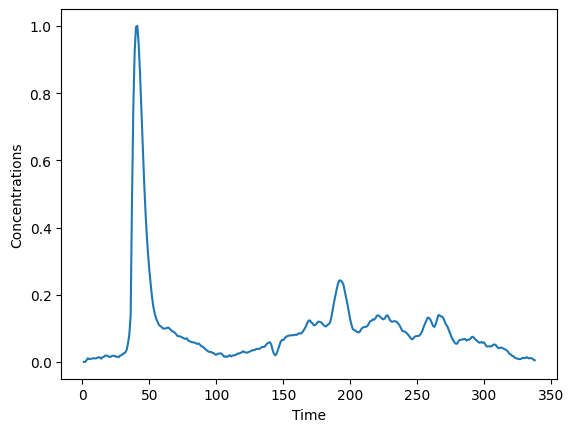

In [12]:
plt.plot(t, dataset)
plt.xlabel('Time')
plt.ylabel('Concentrations')

In [13]:
train_size = int(len(dataset)*0.50)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

##function to create model
def to_sequence(dataset, seq_size=1):
  x=[]
  y=[]

  for i in range(len(dataset)-seq_size-1):
    window = dataset[i:(i+seq_size), 0]
    x.append(window)
    y.append(dataset[i+seq_size, 0])

  return np.array(x),np.array(y)

seq_size = 5
trainX, trainY = to_sequence(train, seq_size)
testX, testY = to_sequence(test, seq_size)


# function to evaluate a model based on the given data
def evaluate_model(model, trainX, trainY, testX, testY):
  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY_inverse = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY_inverse = scaler.inverse_transform([testY])
  trainScore = math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:,0]))
  # print(f"The rmse values at {n} nodes in layer 1 and {m} nodes in layer 2 are as follows - ")
  # print('Train Score: %.2f RMSE', (trainScore))
  testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
  # print('Test Score: %.2f RMSE',(testScore))  
  return trainScore, testScore, trainPredict, testPredict

# these functions return a neural network model trained on our training data. 
# def model_training_Saumya(n,m):
#   model = Sequential()
#   model.add(Dense(n, activation='relu'))
#   model.add(Dense(m, activation='relu'))
#   model.add(Dense(1)) 
#   opt = keras.optimizers.Adam(learning_rate=0.1)
#   model.compile(optimizer=opt, loss='mean_squared_error', metrics= ['accuracy'])
#   model.fit(trainX, trainY, batch_size=45, epochs=200, validation_data=(testX, testY), verbose=0)
#   return model

def model_training_1_layer(n, activation_function):
  model = Sequential()
  model.add(Dense(n[0], activation=activation_function))
  model.add(Dense(1)) 
  opt = keras.optimizers.Adam(learning_rate=0.1)
  model.compile(optimizer=opt, loss='mean_squared_error', metrics= ['accuracy'])
  model.fit(trainX, trainY, batch_size=45, epochs=200, validation_data=(testX, testY), verbose=0)
  return model

def model_training_2_layer(n, activation_function):
  model = Sequential()
  model.add(Dense(n[0], activation=activation_function))
  model.add(Dense(n[1], activation=activation_function))
  model.add(Dense(1)) 
  opt = keras.optimizers.Adam(learning_rate=0.1)
  model.compile(optimizer=opt, loss='mean_squared_error', metrics= ['accuracy'])
  model.fit(trainX, trainY, batch_size=45, epochs=200, validation_data=(testX, testY), verbose=0)
  return model

def model_training_3_layer(n, activation_function):
  model = Sequential()
  model.add(Dense(n[0], activation=activation_function))
  model.add(Dense(n[1], activation=activation_function))
  model.add(Dense(n[2], activation=activation_function))
  model.add(Dense(1)) 
  opt = keras.optimizers.Adam(learning_rate=0.1)
  model.compile(optimizer=opt, loss='mean_squared_error', metrics= ['accuracy'])
  model.fit(trainX, trainY, batch_size=45, epochs=200, validation_data=(testX, testY), verbose=0)
  return model


# train_rmse = []
# test_rmse = []
# models = []

# finalTrainScores = {}
# finalTestScores = {}
# finalTrainPredicts = {}
# finalTestPredicts = {}

# for i in range(3):
#   model = model_training(i)
#   models.append(model)
#   finaltrainScore, finaltestScore, finaltrainPredict, finaltestPredict = evaluate_model(model, trainX, trainY, testX, testY), verbose=0
#   finalTrainScores[(i)] = finaltrainScore
#   finalTestScores[(i)] = finaltestScore
#   finalTrainPredicts[(i)] = finaltrainPredict
#   finalTestPredicts[(i)] = finaltestPredict

# for i in n:
#   for j in m:
#     model = model_training_2_layer(i,j)
#     models.append(model)
#     finaltrainScore, finaltestScore, finaltrainPredict, finaltestPredict = evaluate_model(model, trainX, trainY, testX, testY), verbose=0
#     finalTrainScores[(i, j)] = finaltrainScore
#     finalTestScores[(i, j)] = finaltestScore
#     finalTrainPredicts[(i, j)] = finaltrainPredict
#     finalTestPredicts[(i, j)] = finaltestPredict

# for i in n:
#   for j in m:
#     for k in p:
#       model = model_training_3_layer(i,j,k)
#       models.append(model)  
#       finaltrainScore, finaltestScore, finaltrainPredict, finaltestPredict = evaluate_model(model, trainX, trainY, testX, testY), verbose=0
#       finalTrainScores[(i, j, k)] = finaltrainScore
#       finalTestScores[(i, j, k)] = finaltestScore
#       finalTrainPredicts[(i, j, k)] = finaltrainPredict
#       finalTestPredicts[(i, j, k)] = finaltestPredict

# final_model = models[2]
# finalTrainScores = []
# finalTestScores = []
# finalTrainPredicts = []
# finalTestPredicts = []

# for model in models:
#   finaltrainScore, finaltestScore, finaltrainPredict, finaltestPredict = evaluate_model(model, trainX, trainY, testX, testY), verbose=0
#   finalTrainScores.append(finaltrainScore)
#   finalTestScores.append(finaltestScore)
#   finalTrainPredicts.append(finaltrainPredict)
#   finalTestPredicts.append(finaltestPredict)

# ##create_model
# model = KerasClassifier(build_fn=model)
# ##defining gridsearch parameters
# batch_size = [10, 30, 40, 50, 60, 65, 70, 80]
# epochs = [100, 200, 250, 300]

# parameter_grid = dict(batch_size=batch_size, epochs=epochs)
# mygrid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_job=-1, cv=3)

# model.fit(trainX, trainY, batch_size=45, epochs=300, validation_data=(testX, testY), verbose=0)

In [14]:
maxLayers = 3
layerFuncDict = {}
for i in range(1, maxLayers+1):
  layerFuncDict[i] = eval(f"model_training_{i}_layer")

n1 = [2,4,8,16]
n2 = [2,4,8,16]
n3 = [2,4,8,16]

activation_function = ['relu', 'tanh']

models = []

finalTrainScores = {}
finalTestScores = {}
finalTrainPredicts = {}
finalTestPredicts = {}

In [ ]:
for i in n1:
  model = model_training_1_layer([i], 'relu')
  models.append(model)
  finaltrainScore, finaltestScore, finaltrainPredict, finaltestPredict = evaluate_model(model, trainX, trainY, testX, testY)
  finalTrainScores[(i,)] = finaltrainScore
  finalTestScores[(i,)] = finaltestScore
  finalTrainPredicts[(i,)] = finaltrainPredict
  finalTestPredicts[(i,)] = finaltestPredict
  
for i in n1:
  for j in n2:
    model = model_training_2_layer([i,j], 'relu')
    models.append(model)
    finaltrainScore, finaltestScore, finaltrainPredict, finaltestPredict = evaluate_model(model, trainX, trainY, testX, testY)
    finalTrainScores[(i, j)] = finaltrainScore
    finalTestScores[(i, j)] = finaltestScore
    finalTrainPredicts[(i, j)] = finaltrainPredict
    finalTestPredicts[(i, j)] = finaltestPredict

for i in n1:
  for j in n2:
    for k in n3:
      model = model_training_3_layer([i,j,k], 'relu')
      models.append(model)
      finaltrainScore, finaltestScore, finaltrainPredict, finaltestPredict = evaluate_model(model, trainX, trainY, testX, testY)
      finalTrainScores[(i, j, k)] = finaltrainScore
      finalTestScores[(i, j, k)] = finaltestScore
      finalTrainPredicts[(i, j, k)] = finaltrainPredict
      finalTestPredicts[(i, j, k)] = finaltestPredict

6/6 [==============================] - 0s 2ms/step


KeyboardInterrupt: ignored

In [ ]:
trainTestScores = {}
for key in finalTrainScores:
  trainTestScores[key] = [finalTrainScores[key], finalTestScores[key]]


# len(trainTestScores)

In [ ]:
trainTestScores

{}

In [ ]:
rmseDF = pd.DataFrame([[0,0,0,0,0] for _ in range(len(trainTestScores))], columns = ["Number of Neurons in Layer 1", "Number of Neurons in Layer 2", 'Number of Neurons in Layer 3',"Train RMSE", "Test RMSE"])
print(rmseDF)

    Number of Neurons in Layer 1  Number of Neurons in Layer 2  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   
..                           ...                           ...   
79                             0                             0   
80                             0                             0   
81                             0                             0   
82                             0                             0   
83                             0                             0   

    Number of Neurons in Layer 3  Train RMSE  Test RMSE  
0                              0           0          0  
1                              0           0          0  
2                              0 

In [ ]:
for idx, key in enumerate(trainTestScores):
  rmseDF.iloc[idx, 3] = trainTestScores[key][0]
  rmseDF.iloc[idx, 4] = trainTestScores[key][1]
  for i in range(len(key)):
    rmseDF.iloc[idx, i] = key[i]

In [ ]:
rmseDF

,Number of Neurons in Layer 1,Number of Neurons in Layer 2,Number of Neurons in Layer 3,Train RMSE,Test RMSE
0,2,0,0,0.079404,0.061995
1,4,0,0,0.061297,0.018137
2,8,0,0,0.053963,0.015047
3,16,0,0,0.052759,0.008977
4,2,2,0,0.416552,0.088359
...,...,...,...,...,...
79,16,8,16,0.053289,0.012991
80,16,16,2,0.400699,0.216967
81,16,16,4,0.402659,0.237763
82,16,16,8,0.401615,0.228174


In [ ]:
rmseDF.describe()

,Number of Neurons in Layer 1,Number of Neurons in Layer 2,Number of Neurons in Layer 3,Train RMSE,Test RMSE
count,84.000000,84.000000,84.000000,84.000000,84.000000
mean,7.500000,7.142857,5.714286,0.278286,0.134348
std,5.394107,5.503871,5.700500,0.162378,0.086776
min,2.000000,0.000000,0.000000,0.026664,0.008977
25%,3.500000,2.000000,2.000000,0.075298,0.039020
50%,6.000000,4.000000,4.000000,0.400115,0.151463
75%,10.000000,8.000000,8.000000,0.401806,0.206003
max,16.000000,16.000000,16.000000,0.418707,0.312823


In [ ]:
from seaborn.matrix import Grid

def model_training(n1, n2, n3, layers, activation_function):
  neuronCount = [n1, n2, n3]
  return layerFuncDict[layers](neuronCount, activation_function)

model = KerasClassifier(build_fn=model_training, epochs=6, batch_size=20, verbose=1)

def search(train_test_split=0.8):
  param_grid = dict(n1=n1, n2=n2, n3=n3, layers=range(1, maxLayers+1), activation_function=activation_function)
  grid = RandomizedSearchCV(estimator=model, cv=KFold(3), param_distributions=param_grid, verbose=0,  n_iter=5, n_jobs=1, random_state=0)
  grid_result = grid.fit(trainX, trainY)
  return grid

<ipython-input-58-4b825846029b>:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=model_training, epochs=6, batch_size=20, verbose=1)


In [ ]:
grid = search(i)
grid.best_params_

Epoch 1/6
6/6 [==============================] - 0s 2ms/step - loss: 3565.2292 - accuracy: 0.0093
Epoch 2/6
6/6 [==============================] - 0s 3ms/step - loss: 2492.5681 - accuracy: 0.0093
Epoch 3/6
6/6 [==============================] - 0s 3ms/step - loss: 1633.8064 - accuracy: 0.0093
Epoch 4/6
6/6 [==============================] - 0s 3ms/step - loss: 1164.0067 - accuracy: 0.0093
Epoch 5/6
6/6 [==============================] - 0s 3ms/step - loss: 1013.6504 - accuracy: 0.0093
Epoch 6/6
3/3 [==============================] - 0s 4ms/step - loss: 2572.2783 - accuracy: 0.0364
Epoch 1/6
6/6 [==============================] - 0s 3ms/step - loss: 3510.8657 - accuracy: 0.0183
Epoch 2/6
6/6 [==============================] - 0s 4ms/step - loss: 2418.0081 - accuracy: 0.0092
Epoch 3/6
6/6 [==============================] - 0s 3ms/step - loss: 1576.5183 - accuracy: 0.0092
Epoch 4/6
6/6 [==============================] - 0s 3ms/step - loss: 1133.5244 - accuracy: 0.0092
Epoch 5/6
6/6 [=====

{'n3': 4, 'n2': 4, 'n1': 4, 'layers': 1, 'activation_function': 'tanh'}

In [ ]:
dataframeIntra = pd.read_excel('/content/drive/MyDrive/ANN_Project_data_Groups.xlsx', sheet_name='cluster7', usecols=[6])

datasetIntra = dataframeIntra.to_numpy()
datasetIntra

array([[1.        ],
       [1.00262546],
       [1.00386392],
       [1.00728868],
       [1.00604318],
       [1.00402878],
       [1.00268586],
       [1.00615286],
       [1.0137342 ],
       [1.02424649],
       [1.03832048],
       [1.05464949],
       [1.06252199],
       [1.06147514],
       [1.06408336],
       [1.05082329],
       [1.04649608],
       [1.04189017],
       [1.03930828],
       [1.03604032],
       [1.03397991],
       [1.03511933],
       [1.03481508],
       [1.03993319],
       [1.04299519],
       [1.05051005],
       [1.04748671],
       [1.04897196],
       [1.04339871],
       [1.04810904],
       [1.05687732],
       [1.06216436],
       [1.07696752],
       [1.11496585],
       [1.16842763],
       [1.30565452],
       [2.28270432],
       [3.03560033],
       [3.46587665],
       [3.63661228],
       [3.58514737],
       [3.34483494],
       [2.99284485],
       [2.62635806],
       [2.33539758],
       [2.08437712],
       [1.87178736],
       [1.706

In [ ]:
dataframeInter = pd.read_excel('/content/drive/MyDrive/ANN_Project_data_Groups.xlsx', sheet_name='cluster5', usecols=[6])

datasetInter = dataframeInter.to_numpy()
datasetInter

array([[1.04016951],
       [1.04126471],
       [1.04795783],
       [1.05930379],
       [1.05542143],
       [1.06277473],
       [1.05465789],
       [1.05831326],
       [1.06943591],
       [1.07557208],
       [1.07565975],
       [1.07146261],
       [1.07649963],
       [1.0748104 ],
       [1.07982765],
       [1.08194391],
       [1.07728122],
       [1.08284318],
       [1.08140568],
       [1.07908898],
       [1.08216474],
       [1.08792247],
       [1.09577823],
       [1.09546115],
       [1.08762865],
       [1.08624837],
       [1.11683661],
       [1.17069931],
       [1.24007834],
       [1.22085544],
       [1.18465948],
       [1.18612824],
       [1.29880114],
       [2.06267168],
       [3.06963069],
       [3.635949  ],
       [3.83368027],
       [3.71999395],
       [3.352152  ],
       [2.86476521],
       [2.38781971],
       [2.01079195],
       [1.71681425],
       [1.51632766],
       [1.36307018],
       [1.25587197],
       [1.18721526],
       [1.151

Text(0, 0.5, 'Concentrations')

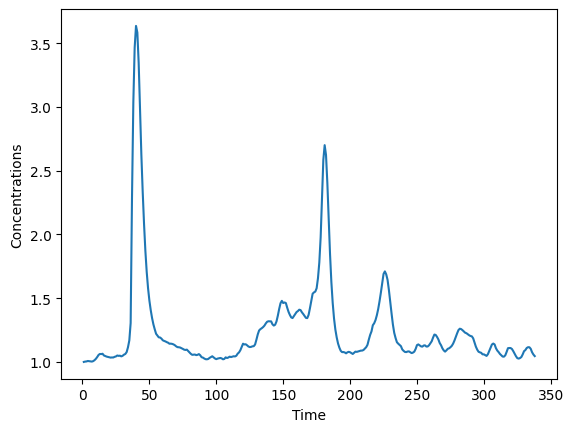

In [ ]:
t = np.arange(1, 339)
plt.style.use('default')
# print(plt.style.available)
plt.plot(t, datasetIntra)
plt.xlabel('Time')
plt.ylabel('Concentrations')

Text(0, 0.5, 'Concentrations')

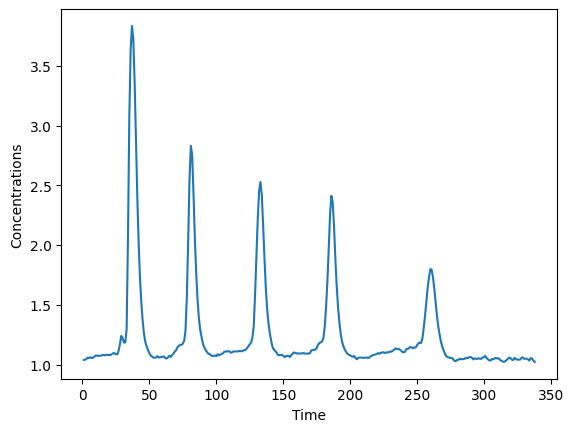

In [ ]:
t = np.arange(1, 339)
plt.style.use('default')
# print(plt.style.available)
plt.plot(t, datasetInter)
plt.xlabel('Time')
plt.ylabel('Concentrations')

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
datasetIntra = scaler.fit_transform(datasetIntra)
datasetIntra

array([[0.00000000e+00],
       [9.95771010e-04],
       [1.46548761e-03],
       [2.76440966e-03],
       [2.29202332e-03],
       [1.52801555e-03],
       [1.01867703e-03],
       [2.33362150e-03],
       [5.20903226e-03],
       [9.19607532e-03],
       [1.45339843e-02],
       [2.07271636e-02],
       [2.37129995e-02],
       [2.33159592e-02],
       [2.43051888e-02],
       [1.92759828e-02],
       [1.76347819e-02],
       [1.58878769e-02],
       [1.49086300e-02],
       [1.36691781e-02],
       [1.28877177e-02],
       [1.33198673e-02],
       [1.32044728e-02],
       [1.51456455e-02],
       [1.63069837e-02],
       [1.91571782e-02],
       [1.80105025e-02],
       [1.85738188e-02],
       [1.64600277e-02],
       [1.82465375e-02],
       [2.15721220e-02],
       [2.35773623e-02],
       [2.91918233e-02],
       [4.36036234e-02],
       [6.38803162e-02],
       [1.15926989e-01],
       [4.86497135e-01],
       [7.72051448e-01],
       [9.35244317e-01],
       [1.00000000e+00],


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
datasetInter = scaler.fit_transform(datasetInter)
datasetInter

array([[6.19187145e-03],
       [6.58149521e-03],
       [8.96261248e-03],
       [1.29990036e-02],
       [1.16178326e-02],
       [1.42338121e-02],
       [1.13461985e-02],
       [1.26466177e-02],
       [1.66035677e-02],
       [1.87865454e-02],
       [1.88177343e-02],
       [1.73245772e-02],
       [1.91165270e-02],
       [1.85155742e-02],
       [2.03004893e-02],
       [2.10533633e-02],
       [1.93945821e-02],
       [2.13732815e-02],
       [2.08618853e-02],
       [2.00377027e-02],
       [2.11319258e-02],
       [2.31802727e-02],
       [2.59750034e-02],
       [2.58621997e-02],
       [2.30757431e-02],
       [2.25847009e-02],
       [3.34666479e-02],
       [5.26286276e-02],
       [7.73106292e-02],
       [7.04719695e-02],
       [5.75950407e-02],
       [5.81175587e-02],
       [9.82016162e-02],
       [3.69953122e-01],
       [7.28184800e-01],
       [9.29655919e-01],
       [1.00000000e+00],
       [9.59555413e-01],
       [8.28693444e-01],
       [6.55302684e-01],


Text(0, 0.5, 'Concentrations')

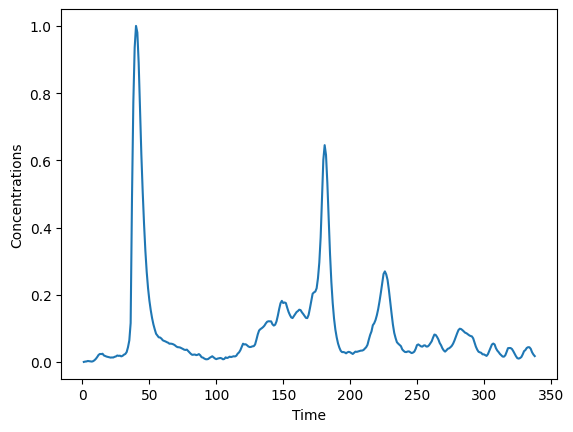

In [ ]:
plt.plot(t, datasetIntra)
plt.xlabel('Time')
plt.ylabel('Concentrations')

Text(0, 0.5, 'Concentrations')

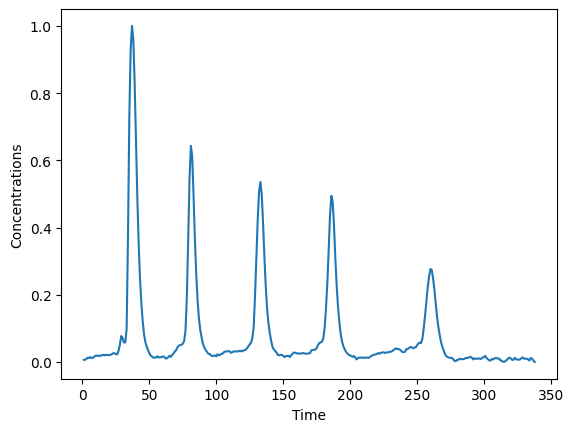

In [ ]:
plt.plot(t, datasetInter)
plt.xlabel('Time')
plt.ylabel('Concentrations')

In [ ]:
testXIntra, testYIntra = to_sequence(datasetIntra, seq_size)

In [ ]:
testXInter, testYInter = to_sequence(datasetInter, seq_size)

In [ ]:
def evaluate_model_test(model, testX, testY):
  testPredict = model.predict(testX)
  testPredict = scaler.inverse_transform(testPredict)
  testY_inverse = scaler.inverse_transform([testY])
  # print(f"The rmse values at {n} nodes in layer 1 and {m} nodes in layer 2 are as follows - ")
  # print('Train Score: %.2f RMSE', (trainScore))
  testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
  return testScore, testPredict

In [ ]:
finalModel = model_training(4,4,4,1,'tanh')

In [ ]:
trainScore, testScore, _, _  = evaluate_model(finalModel, trainX, trainY, testX, testY)
trainScore, testScore

6/6 [==============================] - 0s 2ms/step


(0.07488441975226513, 0.10493818751759763)

In [ ]:
testScoreIntra, testPredictIntra = evaluate_model_test(finalModel, testXIntra, testYIntra)
testScoreIntra

11/11 [==============================] - 0s 2ms/step


0.12466022836839645

In [ ]:
testScoreInter, testPredictInter = evaluate_model_test(finalModel, testXInter, testYInter)
testScoreInter

11/11 [==============================] - 0s 4ms/step


0.16875773620662987

In [ ]:
rmses = [trainScore, testScore, testScoreIntra, testScoreInter]

Text(0, 0.5, 'RMSE Scores')

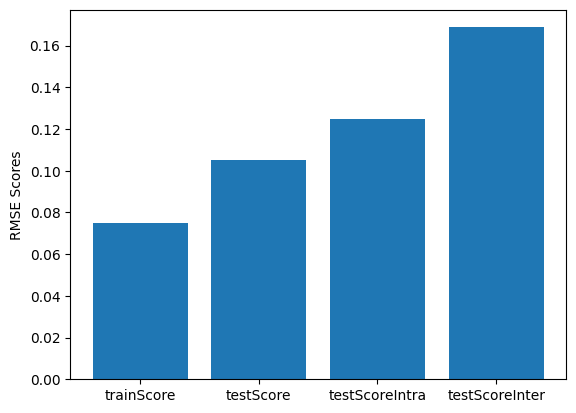

In [ ]:
rmseLabels = ["trainScore", "testScore", "testScoreIntra", "testScoreInter"]

plt.bar(rmseLabels, rmses)

plt.ylabel("RMSE Scores")

In [ ]:
train_rmse = []
test_rmse = []
for i in [0.4,0.5,0.6,0.7,0.8]:
  train_size = int(len(dataset)*i)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

  seq_size = 5
  trainX, trainY = to_sequence(train, seq_size)
  testX, testY = to_sequence(test, seq_size)

  model = Sequential()
  model.add(Dense(4, activation='tanh'))
  model.add(Dense(1)) 
  opt = keras.optimizers.Adam(learning_rate=0.1)
  model.compile(optimizer=opt, loss='mean_squared_error', metrics= ['accuracy'])
  model.fit(trainX, trainY, batch_size=45, epochs=200, validation_data=(testX, testY), verbose=0)

  finaltrainScore, finaltestScore, finaltrainPredict, finaltestPredict = evaluate_model(model, trainX, trainY, testX, testY)
  train_rmse.append(finaltrainScore)
  test_rmse.append(finaltestScore)

2/2 [==============================] - 0s 3ms/step


Text(0.5, 0, 'dataset split %')

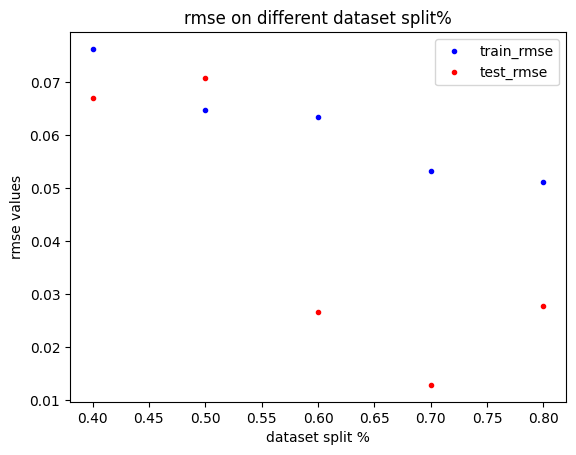

In [ ]:
plt.plot([0.4,0.5,0.6,0.7, 0.8], train_rmse, 'b.')
plt.plot([0.4,0.5,0.6,0.7, 0.8], test_rmse, 'r.')
plt.legend(['train_rmse', 'test_rmse'])
plt.title('rmse on different dataset split%')
plt.ylabel('rmse values')
plt.xlabel('dataset split %')

In [ ]:
train_rmse, test_rmse

([0.05834840419336444,
  0.07038011646326098,
  0.09706685752128635,
  0.07058756907424066,
  0.05150775388400842],
 [0.1075898721004173,
  0.08199637439509978,
  0.051709697483092995,
  0.03582440217265196,
  0.02207414358258418])

In [ ]:
finaltestScore, finaltrainScore

(0.028615464522170855, 0.057398643444616045)

In [ ]:
scaler.inverse_transform([trainY])[0]

array([1.04850344, 1.05044237, 1.05358561, 1.05237623, 1.05212199,
       1.05746118, 1.06201587, 1.05892619, 1.05018809, 1.06198802,
       1.06597418, 1.07514077, 1.07669616, 1.0723734 , 1.06472937,
       1.06489689, 1.07303497, 1.07343684, 1.07424382, 1.06544328,
       1.06855376, 1.06147508, 1.073451  , 1.079208  , 1.08725011,
       1.09539666, 1.1013991 , 1.1226946 , 1.17630023, 1.25144594,
       1.41023441, 2.36422196, 3.15512157, 3.61922335, 3.82617635,
       3.83368027, 3.68367024, 3.43719908, 3.14029994, 2.82729079,
       2.55268123, 2.30164645, 2.09367583, 1.92344891, 1.78772779,
       1.67019482, 1.56311909, 1.48180325, 1.42890911, 1.38621363,
       1.36175815, 1.33541279, 1.32389414, 1.31649404, 1.30358853,
       1.30119246, 1.30266006, 1.30577386, 1.31079743, 1.30216521,
       1.29133313, 1.27937921, 1.27540253, 1.26796038, 1.25423719,
       1.24041374, 1.23757942, 1.23657268, 1.23010592, 1.22446113,
       1.21880671, 1.21504674, 1.22057887, 1.20207525, 1.19678

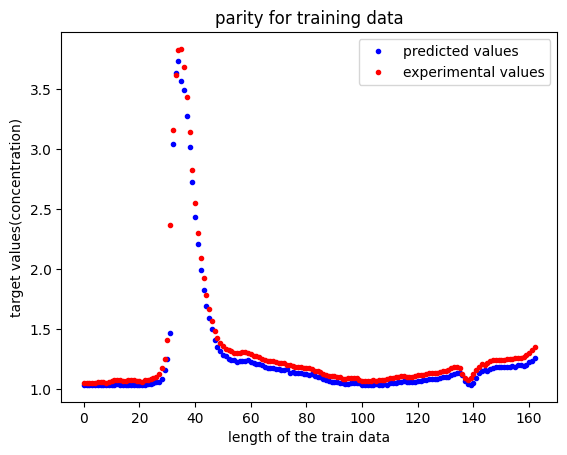

In [ ]:
plt.plot(finaltrainPredict,'b.')
plt.plot(scaler.inverse_transform([trainY])[0],'r.')
plt.title('parity for training data')
plt.ylabel('target values(concentration)')
plt.xlabel('length of the train data')
plt.legend(['predicted values','experimental values'])

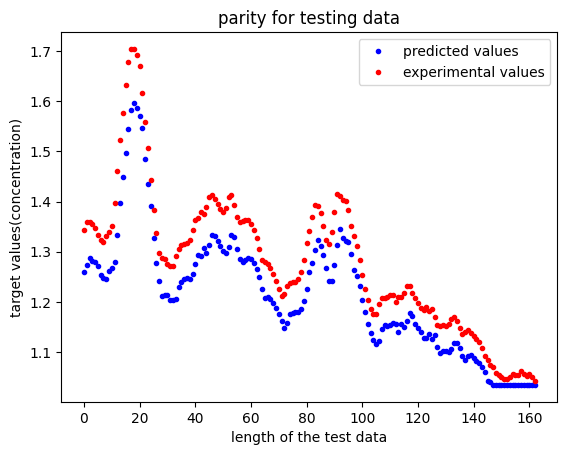

In [ ]:
plt.plot(finaltestPredict,'b.')
plt.plot(scaler.inverse_transform([testY])[0],'r.')
plt.title('parity for testing data')
plt.ylabel('target values(concentration)')
plt.xlabel('length of the test data')
plt.legend(['predicted values','experimental values'])

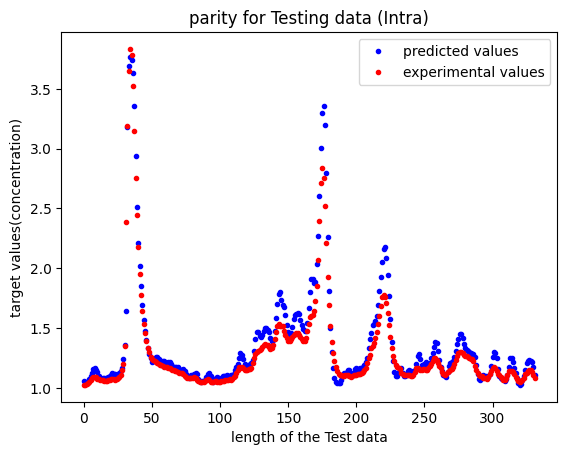

In [ ]:
plt.plot(testPredictIntra,'b.')
plt.plot(scaler.inverse_transform([testYIntra])[0],'r.')
plt.title('parity for Testing data (Intra)')
plt.ylabel('target values(concentration)')
plt.xlabel('length of the Test data')
plt.legend(['predicted values','experimental values'])

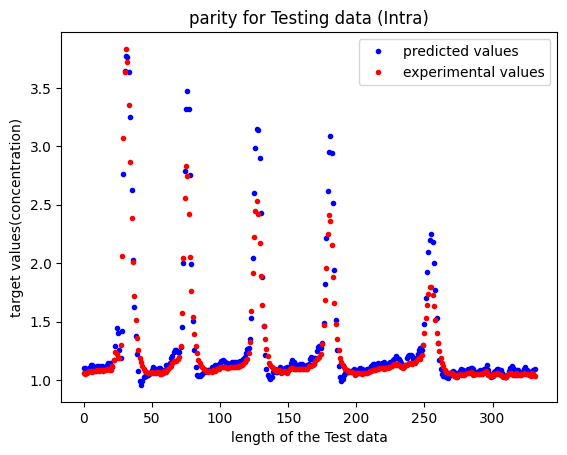

In [ ]:
plt.plot(testPredictInter,'b.')
plt.plot(scaler.inverse_transform([testYInter])[0],'r.')
plt.title('parity for Testing data (Intra)')
plt.ylabel('target values(concentration)')
plt.xlabel('length of the Test data')
plt.legend(['predicted values','experimental values'])

In [ ]:
finaltrainPredict.reshape(finaltrainPredict.shape[0],)

array([1.0218403, 1.0199952, 1.0189613, 1.0347528, 1.0252606, 1.0248514,
       1.0344193, 1.0424088, 1.0324965, 1.0127915, 1.0405835, 1.0471559,
       1.0650427, 1.0510607, 1.0422168, 1.025136 , 1.0333028, 1.053954 ,
       1.0532728, 1.0499192, 1.0269988, 1.0409505, 1.0266198, 1.0594552,
       1.0597132, 1.0757993, 1.0755533, 1.0823255, 1.1163222, 1.2064098,
       1.3188556, 1.5654022, 3.098358 , 3.5389779, 3.6863983, 3.6423333,
       3.5248163, 3.2943947, 3.0074728, 2.7077637, 2.4263287, 2.2063193,
       2.0056028, 1.8488387, 1.7097788, 1.6074157, 1.5068245, 1.4072292,
       1.3426332, 1.3217522, 1.3037444, 1.2990572, 1.2707976, 1.2740883,
       1.2696811, 1.2579478, 1.2588718, 1.2656938, 1.2767701, 1.2808577,
       1.2584754, 1.239828 , 1.2222608, 1.231107 , 1.2245848, 1.2060299,
       1.1859429, 1.194278 , 1.2024968, 1.1942685, 1.1832893, 1.1761923,
       1.1769776, 1.1921735, 1.1546141, 1.1540369, 1.1428466, 1.1554286,
       1.1531452, 1.1509045, 1.1404029, 1.135043 , 

In [ ]:
correlation = np.corrcoef(finaltestPredict.reshape(finaltestPredict.shape[0],), testY)
correlation[0][1]

In [ ]:
#shift train predictions for plotting we must shift the predictions so that they align on the x-axis with the
#original dataset.
final_model = models[-3]
finaltrainScore, finaltestScore, finaltrainPredict, finaltestPredict = evaluate_model(final_model, trainX, trainY, testX, testY, n,m)

finaltrainPredictPlot = np.empty_like(dataset)
finaltrainPredictPlot[:, :] = np.nan
finaltrainPredictPlot[seq_size:len(finaltrainPredict)+seq_size, :] = finaltrainPredict

# plotting of the result
finaltestPredictPlot = np.empty_like(dataset)
finaltestPredictPlot[:, :] = np.nan
finaltestPredictPlot[len(finaltrainPredict)+(seq_size*2)+1:len(dataset)-1, :] = finaltestPredict
plt.figure(figsize=(30,15))
dataset = scaler.inverse_transform(dataset)
plt.scatter(np.arange(1, 339),dataset)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.plot(finaltrainPredictPlot)
plt.plot(finaltestPredictPlot)
plt.show()

In [ ]:
sns.regplot(testY ,finaltestPredict)

In [ ]:
best_model_dataframe = pd.DataFrame(columns=['column in cluster','train_rmse','test_rmse'])

In [ ]:
best_model_dataframe

,column in cluster,train_rmse,test_rmse


In [ ]:
for i in range(1,30):
  dataframe = pd.read_excel('/content/drive/MyDrive/ANN_Project_data_Groups.xlsx', sheet_name='cluster7', usecols=[i])

  dataset = dataframe.to_numpy()
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset)
  train_size = int(len(dataset)*0.80)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

  ##function to create model
  def to_sequence(dataset, seq_size=1):
    x=[]
    y=[]

    for i in range(len(dataset)-seq_size-1):
      window = dataset[i:(i+seq_size), 0]
      x.append(window)
      y.append(dataset[i+seq_size, 0])

    return np.array(x),np.array(y)

  seq_size = 5
  trainX, trainY = to_sequence(train, seq_size)
  testX, testY = to_sequence(test, seq_size)
  finaltrainScore8, finaltestScore8, finaltrainPredict8, finaltestPredict8 = evaluate_model(model, trainX, trainY, testX, testY)
  best_model_dataframe.loc[i-1] = [i,finaltrainScore8, finaltestScore8]
  print(finaltrainScore8, finaltestScore8)

2/2 [==============================] - 0s 7ms/step
0.09768697921264326 0.08599731024160524
2/2 [==============================] - 0s 5ms/step
0.03960234445905591 0.012262576249545938
2/2 [==============================] - 0s 6ms/step
0.07655909425969805 0.054514449271093474
2/2 [==============================] - 0s 5ms/step
0.05926221076905095 0.01419280063416814
2/2 [==============================] - 0s 7ms/step
0.046766846843510526 0.01126425415342731
2/2 [==============================] - 0s 6ms/step
0.06669223590992841 0.015772655623318727
2/2 [==============================] - 0s 5ms/step
0.08058222356655256 0.021429281489644656
2/2 [==============================] - 0s 6ms/step
0.03273062555336334 0.01331284829889904
2/2 [==============================] - 0s 5ms/step
0.04508585270569098 0.02203822379751366
2/2 [==============================] - 0s 5ms/step
0.12801065922372243 0.13023839685369548
2/2 [==============================] - 0s 4ms/step
0.0502865665450888 0.0149116906392

In [ ]:
best_model_dataframe['differential'] = abs(best_model_dataframe['train_rmse']-best_model_dataframe['test_rmse'])

In [ ]:
best_model_dataframe

,column in cluster,train_rmse,test_rmse,differential
0,1.0,0.097687,0.085997,0.011690
1,2.0,0.039602,0.012263,0.027340
2,3.0,0.076559,0.054514,0.022045
3,4.0,0.059262,0.014193,0.045069
4,5.0,0.046767,0.011264,0.035503
5,6.0,0.066692,0.015773,0.050920
6,7.0,0.080582,0.021429,0.059153
7,8.0,0.032731,0.013313,0.019418
8,9.0,0.045086,0.022038,0.023048
9,10.0,0.128011,0.130238,0.002228


In [ ]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 4)                 24        
                                                                 
 dense_85 (Dense)            (None, 1)                 5         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
